In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import metrics
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#read train data
train = pd.read_csv("D:/prasad/loacl disk d/Data science/PROJECT/Loan Prediction Problem/train_ctrUa4K (1).csv")
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
# data distribution using rows and columns
rows, columns = train.shape
print("Rows: ", rows)
print("Columns: ", columns)
print(train.info())

Rows:  614
Columns:  13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
# to understand statistic variation only affect on datatype int varible
print(train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [6]:
# converting characterize data into numeric
train['Gender'] = train['Gender'].replace(['Male', 'Female'], [1, 0])
train['Loan_Status'] = train['Loan_Status'].replace(['Y', 'N'], [1, 0])
train['Married'] = train['Married'].replace(['Yes', 'No'], [1, 0])
train['Education'] = train['Education'].replace(['Graduate', 'Not Graduate'], [1, 0])
train['Self_Employed'] = train['Self_Employed'].replace(['Yes', 'No'], [1, 0])
train['Property_Area'] = train['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'], [2, 1, 0])
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [7]:
# check missing values
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# fill the missing value with mode
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

# check the null blocks
train.isnull().sum()
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [9]:
# check columns
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


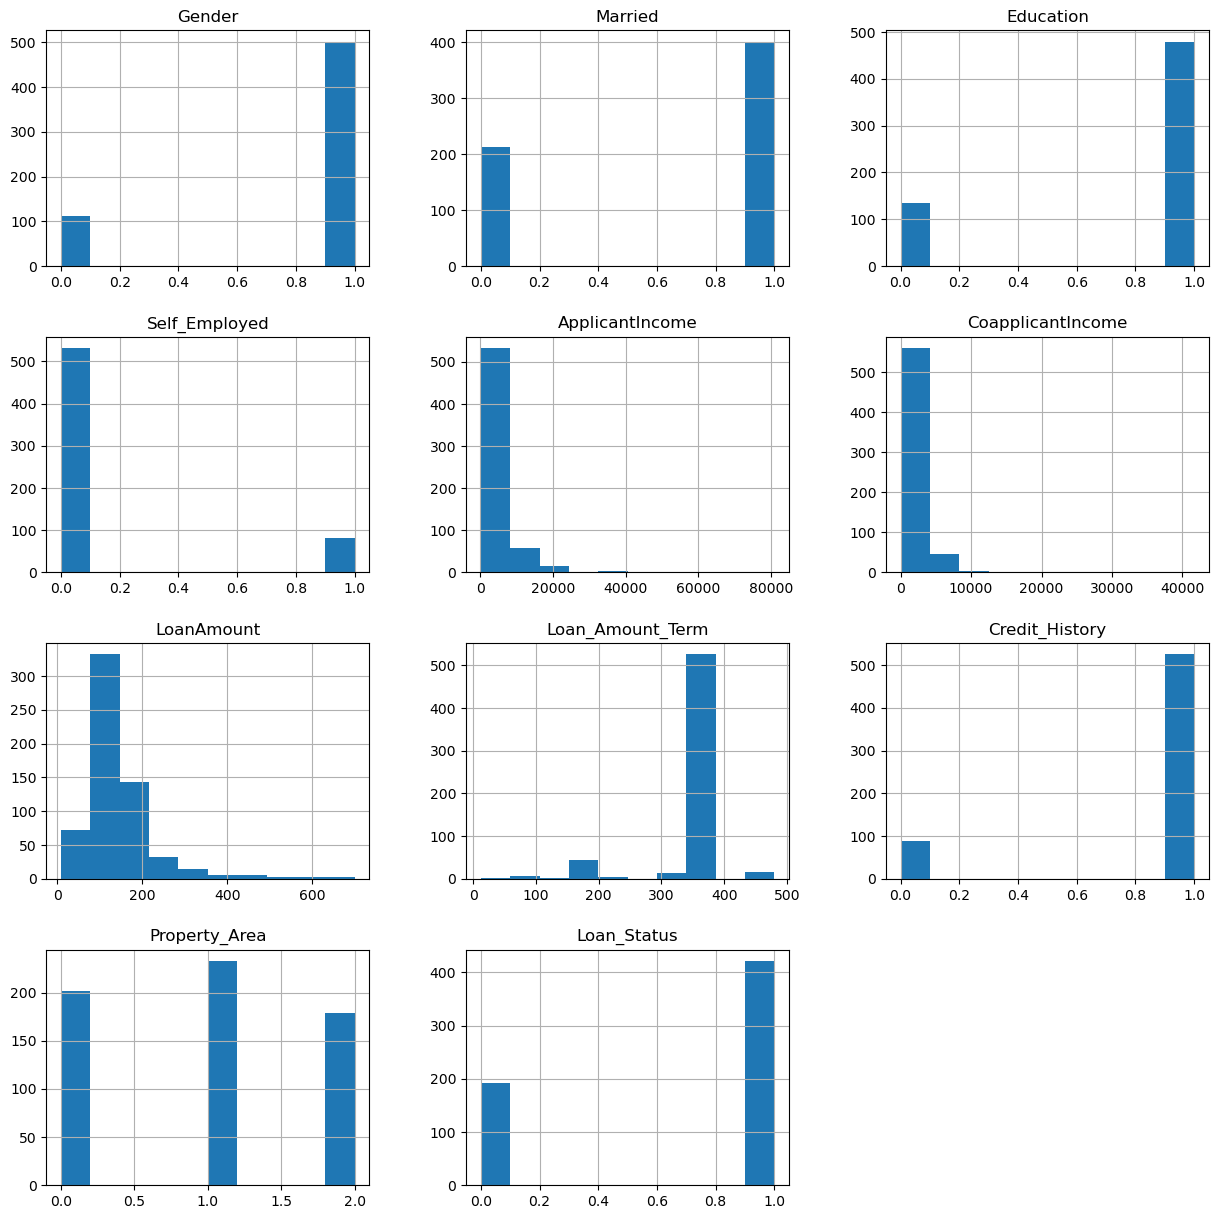

In [10]:
# check data distribution
train.hist(figsize=(15, 15))
plt.show()

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

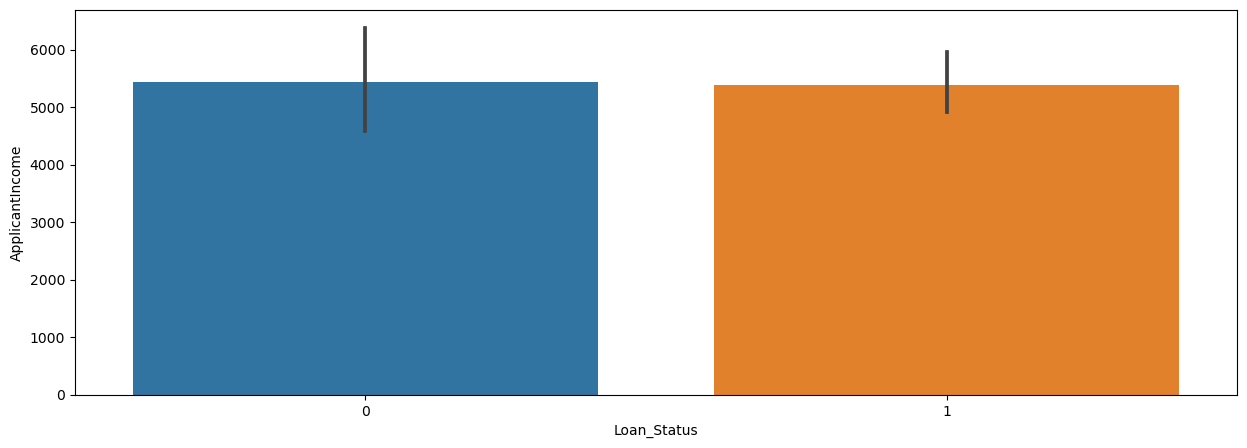

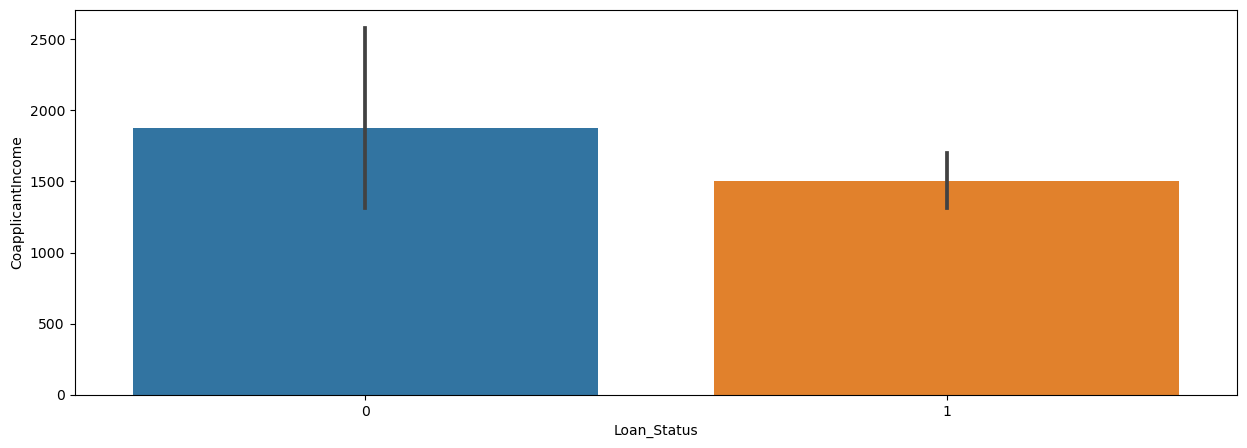

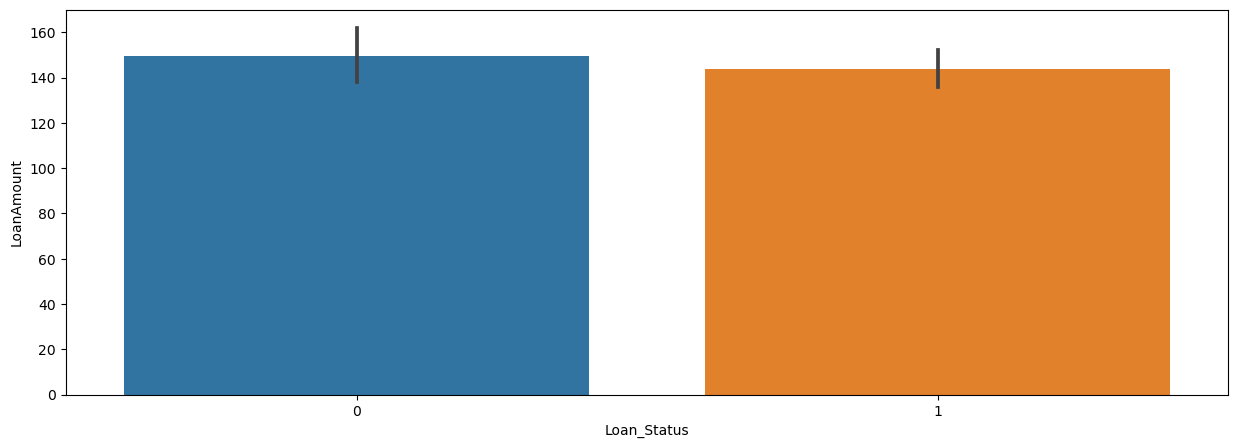

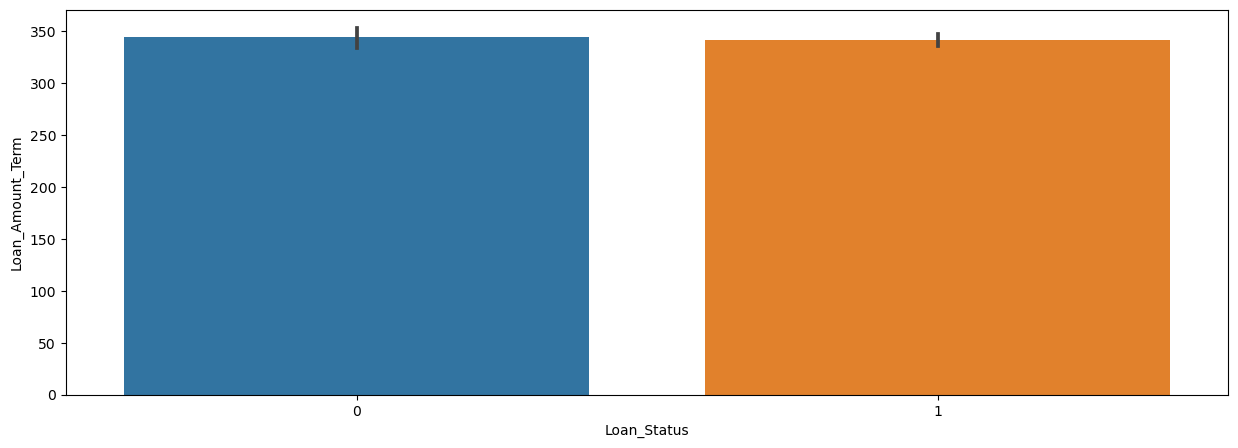

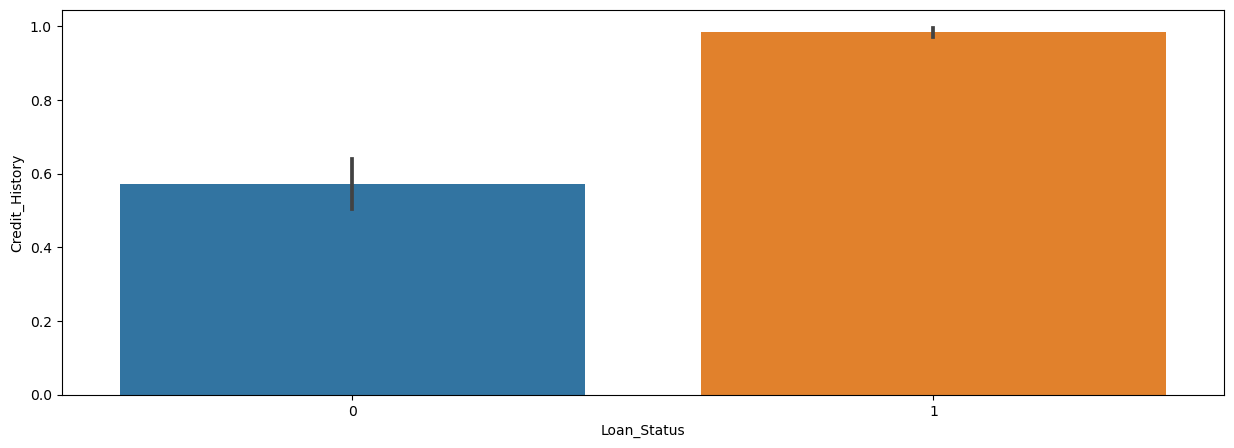

In [11]:
# uni-variate analysis for Applicant Income
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Loan_Status'], y=train['ApplicantIncome'])
#plt.xticks()

# uni-variate analysis for Co-applicant Income
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Loan_Status'], y=train['CoapplicantIncome'])
#plt.xticks()

# uni-variate analysis for loan amount
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Loan_Status'], y=train['LoanAmount'])
#plt.xticks()

# uni-variate analysis for loan amount term
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Loan_Status'], y=train['Loan_Amount_Term'])
#plt.xticks()

# uni-variate analysis for Credit History
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Loan_Status'], y=train['Credit_History'])
#plt.xticks()


In [12]:
# check count of target variable
print(train["Loan_Status"].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


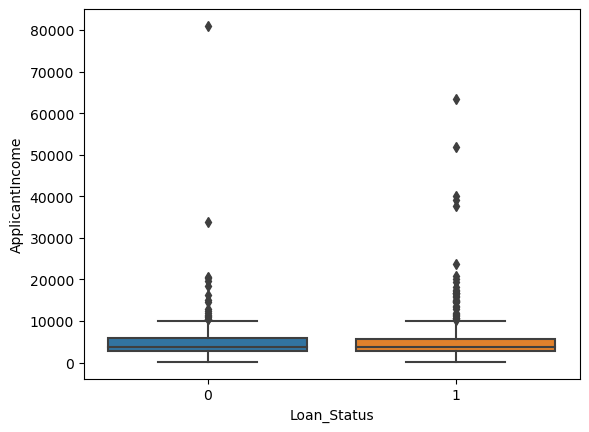

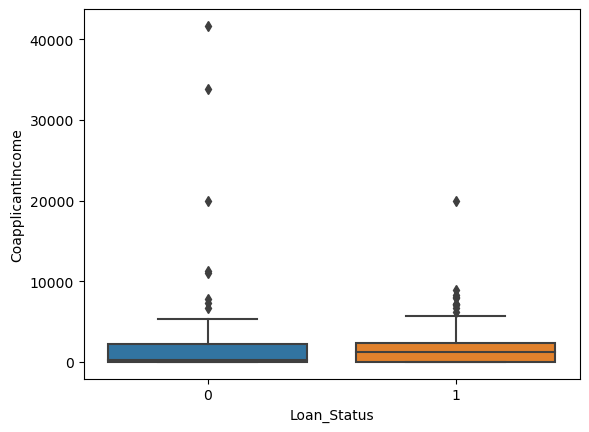

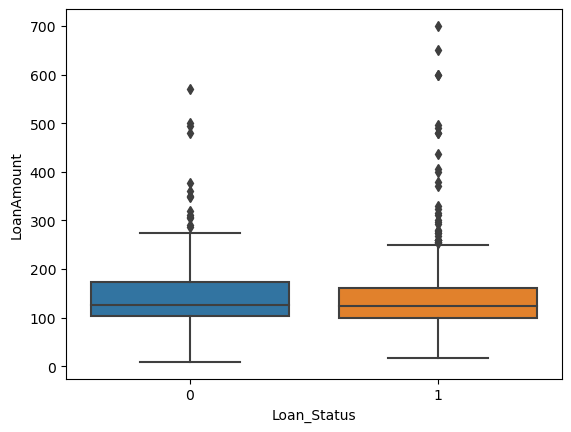

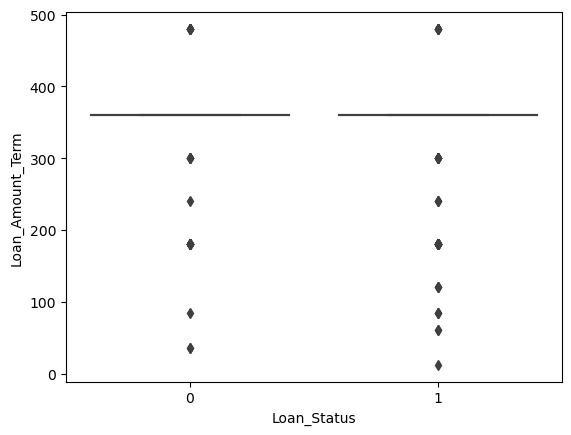

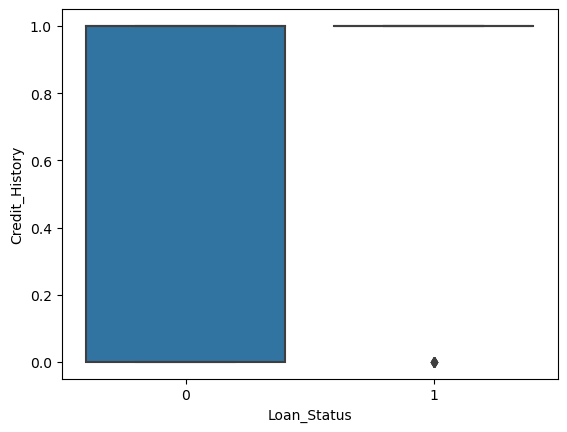

In [13]:
# data analyzing using box plot method
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train)
plt.show()
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train)
plt.show()
sns.boxplot(x="Loan_Status", y="LoanAmount", data=train)
plt.show()
sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data=train)
plt.show()
sns.boxplot(x="Loan_Status", y="Credit_History", data=train)
plt.show()

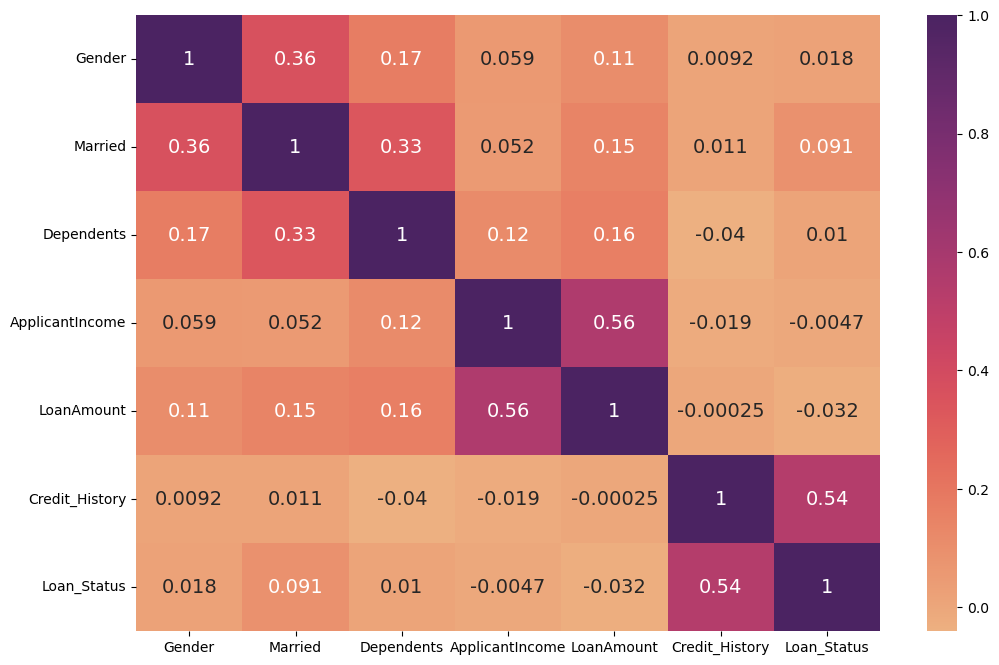

In [14]:
# plot correlation
train['Dependents'] = train['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])
cols = ["Loan_ID", "Self_Employed",  "Education", "Property_Area", "CoapplicantIncome", "Loan_Amount_Term"]
train = train.drop(columns=cols, axis=1)
fig, ax = plt.subplots(figsize=(12, 8))
corr_matrix = train.corr()
corr_heatmap = sns.heatmap(corr_matrix, cmap="flare", annot=True, ax=ax, annot_kws={"size": 14})
#plt.show()

plot categorical features
Y    422
N    192
Name: Loan_Status, dtype: int64


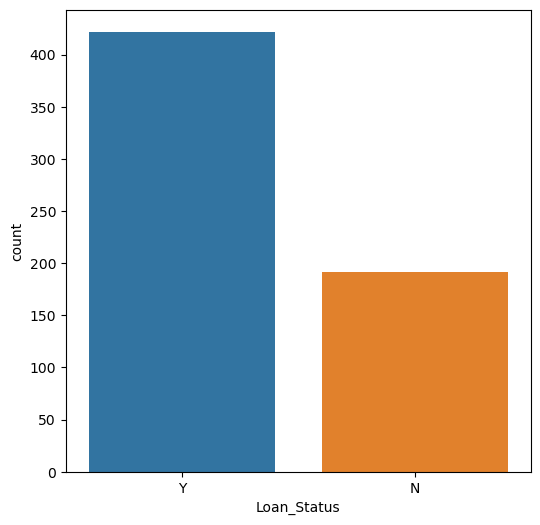

In [15]:
# plot categorical features
print("plot categorical features")
def categorical_valcount_hist(feature):
    test = pd.read_csv("D:/prasad/loacl disk d/Data science/PROJECT/Loan Prediction Problem/train_ctrUa4K (1).csv")
    print(test[feature].value_counts())
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.countplot(x=feature, ax=ax, data=test)
    plt.show()
categorical_valcount_hist("Loan_Status")

In [16]:
# splitting data into train and test split
x = train.drop("Loan_Status", axis=1)
y = train["Loan_Status"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [17]:
# Logistic Regression Model
# fit model no training data
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# make predictions for test data
y_pred = logreg.predict(x_test)

In [19]:
# check accuracy
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

print(train.columns)

-------------------------TEST SCORES-----------------------
Recall: 96.4706
Precision: 78.0952
F1-Score: 86.3158
Accuracy score: 78.8618
AUC Score: 67.9721
Index(['Gender', 'Married', 'Dependents', 'ApplicantIncome', 'LoanAmount',
       'Credit_History', 'Loan_Status'],
      dtype='object')
